### goal
The goal of this projet is developed un model and to know the sales of each product in a store bigmart given. We will use the dataset of the sales bigmart

After the choice of subject and getting an dataseet, let's move to the phase of preprocessing

In [185]:
#since our data are in two files, Train.csv and Test.csv, we go to treat first the file contain the training data
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
#load the data
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [186]:
#view the informtion the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [187]:
#verification of the statistics
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [188]:
#check the sum of the missing value with isnull
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [189]:
#treat the columns 'Item_Weight', 'Outlet_size'
#look the sum differents values of 'Item_Weight'
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [190]:
#replace the nan values in 'Item_Weight' by the mean
#since the mean is sensitive to outliers, we go create a new dataframe from df and to drop in the outliers then 
def get_iqr_values(df_in, col_name):#function for calculate the inter quartilr
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    
    iqr = q3 - q1
    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr
    return median, q1, q3, iqr, minimum, maximum
def remove_outliers(df_in, col_name):#function for remove the outlets
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out
new_df = df['Item_Weight']
#colonnes = new_df.columns.tolist()
#for elt in colonnes:
#    df_out = remove_outliers(new_df, elt)
#df_out.shape
df.fillna({'Item_Weight': new_df.mean()}, inplace=True)

In [191]:
 #look the sum differents values of 'Item_Weight'
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [192]:
#replace the nan values in 'Outlet_Size' by the mode
df.fillna({'Outlet_Size': df['Outlet_Size'].mode()[0]}, inplace=True)

In [193]:
#check again the nan value
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [194]:
#drop the duplicated values in the columns who serve identifiants
df.drop_duplicates(subset = ['Item_Identifier', 'Outlet_Identifier'], inplace=True)
#let's check if there is nan values in the the dataframe
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [195]:
#drop the columns who serve identifiants
df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 732.4+ KB


After the stage of cleaning, we will attack the stage of transformation

In [196]:
#here, we will encode our categorical variable
#selecting our categorical variables
#our categorical variable is Item_Fat_Content, Item_type, Outlet_Size, Outlet_Location_Type, Outlet_Type
#apply the one-hot encodage
dummies = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
dummies_data = pd.get_dummies(df[dummies])
#get the shape of dummies_data
dummies_data.shape

(8523, 31)

In [197]:
#drop the columns dummies
new_df = df.drop(dummies, axis=1)
#join the encodage
new_df = new_df.join(dummies_data)

In [198]:
new_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


the features selected from this party is Item_Weight, Outlet_Etablishment_Year. Now we will atack the stage of visualization.

The first thing we would want to explore in the datavisualization is the variables distribution

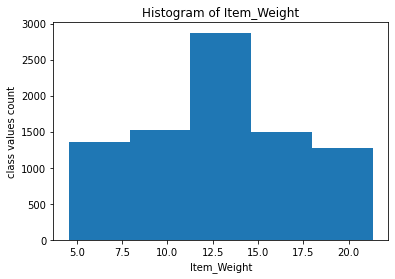

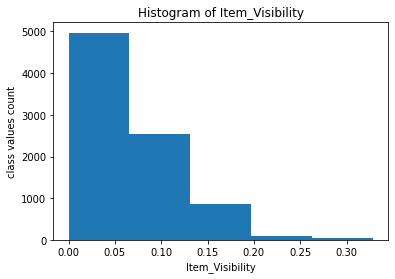

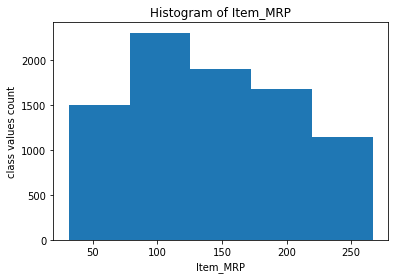

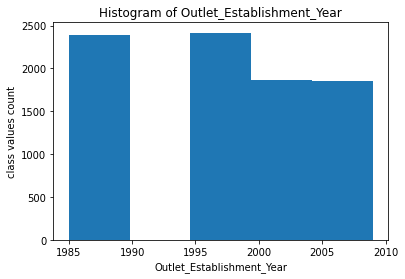

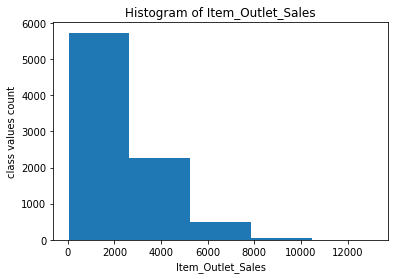

In [199]:
#building a group boxplot for our numerical variable df
def plot_histo(df, colunms):
    for elt in columns:  
        plt.hist(df[elt], bins=5)
        plt.title('Histogram of {}'.format(elt))
        plt.xlabel(elt)
        plt.ylabel('class values count')
        plt.show()
columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
plot_histo(df, columns)
#ax = fig.add_subplot(111)
#ax.hist(df[columns])
#ax.set_xticklabels(columns)


### Commentaire
tha Hitograms what we have just built have allowed us to see the distribution of our variables. we can through these graphs determine the most and least represented class

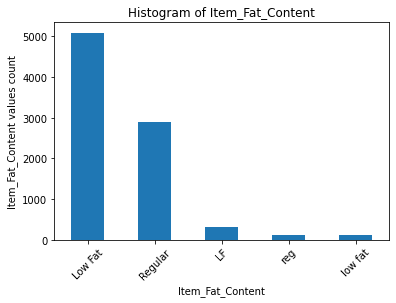

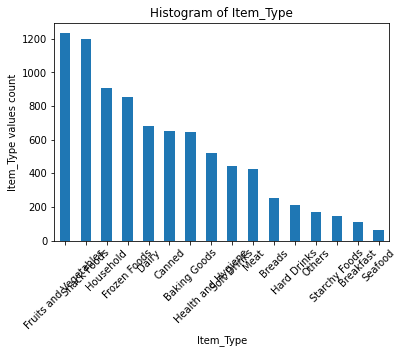

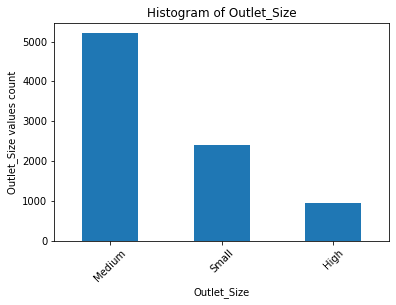

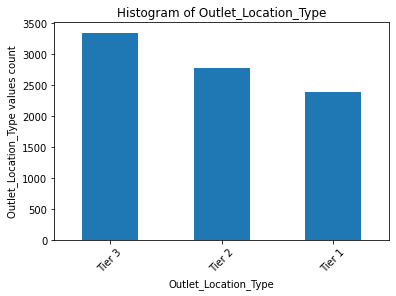

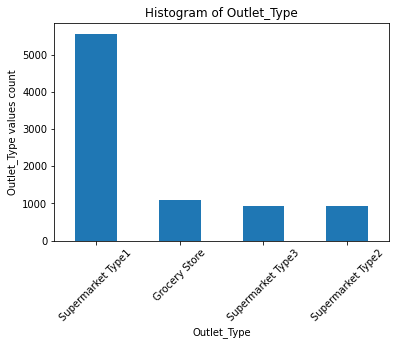

In [200]:
#after plot the numerical variables, let's plot the cateorical variables
def plot_bar(columns):
     for elt in columns:  
        plt.title('Histogram of {}'.format(elt))
        plt.xlabel(elt)
        plt.ylabel(elt+' values count')
        v = df[elt].value_counts()
        v.plot.bar(rot=45)
        plt.show()
columns1 = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
plot_bar(columns1)

### remark
As with histograms, our bars charts allow us to determine the most and the least represented categories of our variables

Now lets go to visualize the correlation between the features et the target

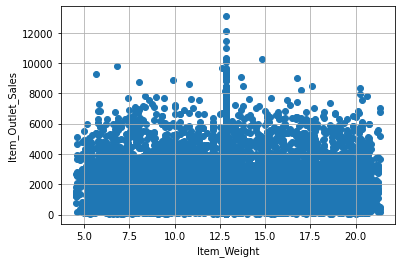

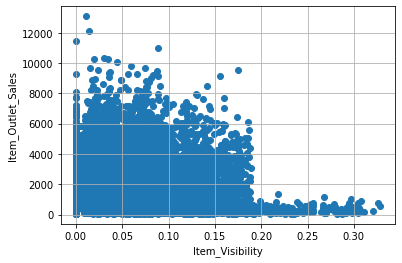

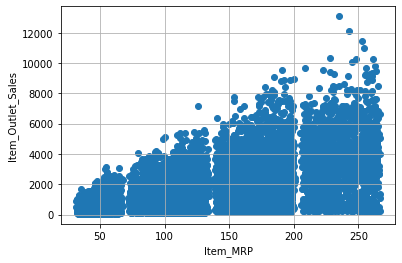

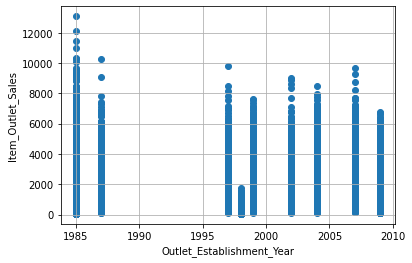

In [201]:
target = df['Item_Outlet_Sales']#get the target variables
#features = df.drop(columns=['Item_Outlet_Sales'], axis=1)#get the features variables
#features = features.columns.tolist()#converting the features columns to list
#create a function who plot correlation betwenn target et numerical variables
def plot_correlation(df, columns):
    for elt in columns:
        axes = plt.axes()
        axes.grid()
        plt.xlabel(elt)
        plt.ylabel('Item_Outlet_Sales')
        plt.scatter(df[elt], df['Item_Outlet_Sales'])
        plt.show()
numericals = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
plot_correlation(df, numericals)

we see through the graphics than it have correlation between the target 'Item_Outlet_Sales' and the features 'Item_Weight', 'Item_Visibility', 'Item_MRP' because we can get a line which passes closes to the majority of points.

We can deduct on this graphs our features are 'Item_Visibility', 'Item_Weight', 'Item_MRP'

In [229]:
#now will use the Anova test for see the correlation between the categorical variable and the target
#function for calculate anova
def calcul_anova(categoricals, df):
    model = ols(categoricals, data=df).fit()
    anova = sm.stats.anova_lm(model, type=2)
    return anova
#find the anova for categoricals variables of df
categoricals_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for elt in categoricals_columns: #using columns numerical
    print('Test anova of columns {}'.format(elt))
    categoricals_anova = 'Item_Outlet_Sales ~ {}'.format(elt)
    print(calcul_anova(categoricals_anova, df), '\n')
    print(')
    

Test anova of columns Item_Fat_Content
                      df        sum_sq       mean_sq         F    PR(>F)
Item_Fat_Content     4.0  2.009519e+07  5.023797e+06  1.725709  0.141221
Residual          8518.0  2.479717e+10  2.911149e+06       NaN       NaN 

Test anova of columns Item_Type
               df        sum_sq       mean_sq         F    PR(>F)
Item_Type    15.0  1.176182e+08  7.841211e+06  2.700653  0.000388
Residual   8507.0  2.469965e+10  2.903450e+06       NaN       NaN 

Test anova of columns Outlet_Size
                 df        sum_sq       mean_sq          F        PR(>F)
Outlet_Size     2.0  2.404920e+08  1.202460e+08  41.685538  9.642804e-19
Residual     8520.0  2.457677e+10  2.884598e+06        NaN           NaN 

Test anova of columns Outlet_Location_Type
                          df        sum_sq       mean_sq         F  \
Outlet_Location_Type     2.0  3.103504e+08  1.551752e+08  53.94774   
Residual              8520.0  2.450691e+10  2.876398e+06       NaN   


-----------------------------treatement of test data--------------------------

Now, we move on to test data preprocessing, so we will repeat the previously stage

In [203]:
#load the date
df1 = pd.read_csv('Test.csv')
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [204]:
#view the information of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [205]:
#verifications of the statistiques
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [206]:
#check the sum of the missing value with isnull
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We will remove the NAN values on the test data

In [207]:
#we remove all lines contain NAN values
df1.dropna(axis=0, how='any', inplace=True)
#verification
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [208]:
#informations
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3099 entries, 0 to 5677
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            3099 non-null   object 
 1   Item_Weight                3099 non-null   float64
 2   Item_Fat_Content           3099 non-null   object 
 3   Item_Visibility            3099 non-null   float64
 4   Item_Type                  3099 non-null   object 
 5   Item_MRP                   3099 non-null   float64
 6   Outlet_Identifier          3099 non-null   object 
 7   Outlet_Establishment_Year  3099 non-null   int64  
 8   Outlet_Size                3099 non-null   object 
 9   Outlet_Location_Type       3099 non-null   object 
 10  Outlet_Type                3099 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 290.5+ KB


In [209]:
#drop the duplicated values in the columns who serve identifiants
df1.drop_duplicates(subset = ['Item_Identifier', 'Outlet_Identifier'], inplace=True)
#let's check if there is nan values in the the dataframe
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [210]:
#drop the columns which serve identifiants
df1.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3099 entries, 0 to 5677
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                3099 non-null   float64
 1   Item_Fat_Content           3099 non-null   object 
 2   Item_Visibility            3099 non-null   float64
 3   Item_Type                  3099 non-null   object 
 4   Item_MRP                   3099 non-null   float64
 5   Outlet_Establishment_Year  3099 non-null   int64  
 6   Outlet_Size                3099 non-null   object 
 7   Outlet_Location_Type       3099 non-null   object 
 8   Outlet_Type                3099 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 242.1+ KB


After the stage of cleaning, we will attack the stage of transformation for our test data

In [211]:
#here, we will encode our categorical variable
#selecting our categorical variables
#our categorical variable is Item_Fat_Content, Item_type, Outlet_Size, Outlet_Location_Type, Outlet_Type
#apply the one-hot encodage
dummies = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
dummies_data = pd.get_dummies(df1[dummies])
#get the shape of dummies_data
dummies_data.shape

(3099, 29)

In [212]:
#drop the columns dummies
new_df1 = df1.drop(dummies, axis=1)
#join the encodage
new_df1 = new_df1.join(dummies_data)
new_df1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,20.750,0.007565,107.8622,1999,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5,9.800,0.063817,117.1492,1997,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
6,19.350,0.082602,50.1034,2009,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
13,4.785,0.092738,122.3098,1999,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
14,16.750,0.021206,52.0298,1987,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
